In [1]:
import numpy as np 

import matplotlib.pyplot as plt

# This import is needed to modify the way figure behaves
from mpl_toolkits.mplot3d import Axes3D
Axes3D
%matplotlib inline 

from ipywidgets import *

import pickle_functions as PK
import plot_functions as PL
import helpers as HL

%load_ext autoreload
import pickle
%autoreload 2


In [2]:
folder="SectionE_grid"
modification="density"
np.random.seed(123)

In [3]:
distributions=['uniform','normal','mixed_normal','beta']

In [4]:
Xs, colors, X_2ds,distributions=PK.get_augmented_swissroll(create=False, density=True)

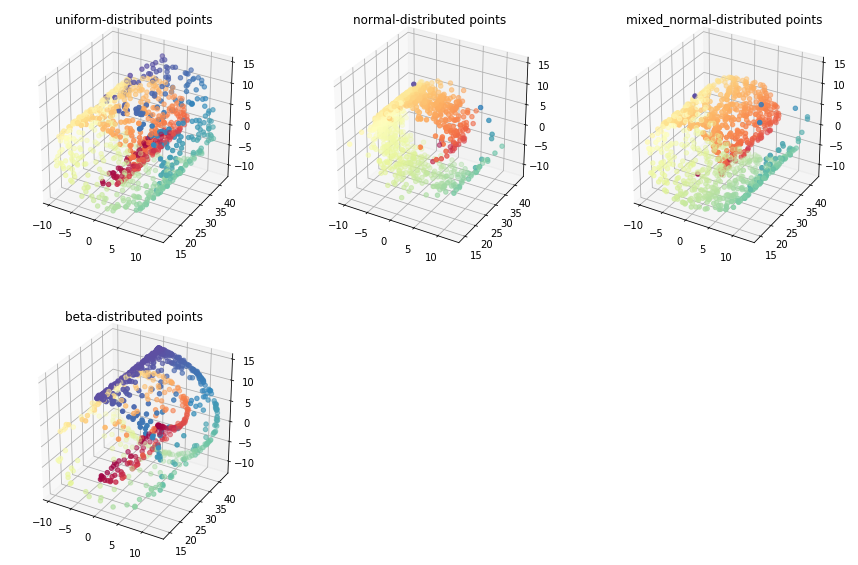

In [5]:

PL.plot_augmented_swissrolls(Xs, colors, distributions, 'distribution')


In [ ]:
for i, X_2d in enumerate(X_2ds): 
    print(distributions[i])
    HL.plot_2d(X_2d,colors[i])
    plt.show()

# For each dataset, we want to get the LLE transformation with varying regularisation term

In [6]:
r_Ys,reg,r_times,r_reconstruction_errors,r_difference=PK.lle_different_data('r',folder, modification,N=4,create=False,Xs=Xs, X_2ds=X_2ds)

In [7]:
interactive(PL.plot_inter_grid, Z=fixed(r_Ys), colors=fixed(colors),var1=fixed([1,2,3,4]),var2=fixed(reg),variable=fixed('reg'), 
            transformation=fixed('LLE'),j=widgets.IntSlider(min=0,max=len(r_Ys)-1,step=1, value=0),
            i=widgets.IntSlider(min=0,max=len(reg)-1,step=1, value=0),
           error=fixed(r_reconstruction_errors),
            times=fixed(r_times),difference=fixed(r_difference)
           ,error_type=fixed('reconstruction error'),
           data_augmentation=fixed('distribution'))

/Users/HeddaVik/anaconda/lib/python3.6/site-packages/traitlets/traitlets.py:567: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  silent = bool(old_value == new_value)


# For each dataset, we want to get the LLE transformation with varying number of neighbours. 

In [8]:
n_Ys,neighbours,n_times,n_reconstruction_errors,n_difference=PK.lle_different_data('n',folder, modification,N=4,create=False,Xs=Xs, X_2ds=X_2ds)

In [9]:
interactive(PL.plot_inter_grid, Z=fixed(n_Ys), colors=fixed(colors),var1=fixed([1,2,3,4]),var2=fixed(neighbours),variable=fixed('n_neighbors'), 
            transformation=fixed('LLE'),j=widgets.IntSlider(min=0,max=len(n_Ys)-1,step=1, value=0),
            i=widgets.IntSlider(min=0,max=len(neighbours)-1,step=1, value=0),
           error=fixed(n_reconstruction_errors),
            times=fixed(n_times),difference=fixed(n_difference)
           ,error_type=fixed('reconstruction error'),
           data_augmentation=fixed('distribution'))

/Users/HeddaVik/anaconda/lib/python3.6/site-packages/traitlets/traitlets.py:567: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  silent = bool(old_value == new_value)


# For each dataset, we want to get the t-SNE transformation with varying perplexity. 

In [10]:
p_Zs,per,p_times,p_kl_divergences,p_difference=PK.t_sne_different_data('p',folder, modification,N=4,create=False,Xs=Xs, X_2ds=X_2ds)

In [11]:
interactive(PL.plot_inter_grid, Z=fixed(p_Zs), colors=fixed(colors),var1=fixed([1,2,3,4]),var2=fixed(per),variable=fixed('per'), 
                                                                                transformation=fixed('t-SNE'),
                                                                                j=widgets.IntSlider(min=0,max=len(p_Zs)-1,step=1, value=0),
                                                                                i=widgets.IntSlider(min=0,max=len(per)-1,step=1, value=0),
                                                                                error=fixed(p_kl_divergences),
                                                                                times=fixed(p_times),difference=fixed(p_difference),
                                                                                error_type=fixed('KL-divergence'),
                                                                                data_augmentation=fixed('distribution'))

/Users/HeddaVik/anaconda/lib/python3.6/site-packages/traitlets/traitlets.py:567: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  silent = bool(old_value == new_value)


In [ ]:
#Plotting a figure to compare the two methods: 

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(431)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('LLE, Uniform distribution, K=9')
ax.scatter(n_Ys[0][6][:, 0], n_Ys[0][6][:, 1], c=colors[0], cmap=plt.cm.Spectral)
ax = fig.add_subplot(434)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('LLE, Dataset 1, K=14')
ax.scatter(n_Ys[1][11][:, 0], n_Ys[1][11][:, 1], c=colors[1], cmap=plt.cm.Spectral)
ax = fig.add_subplot(437)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('LLE, Dataset 2, K=11')
ax.scatter(n_Ys[2][8][:, 0], n_Ys[2][8][:, 1], c=colors[2], cmap=plt.cm.Spectral)
ax = fig.add_subplot(4,3,10)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('LLE, Dataset 3, K=7')
ax.scatter(n_Ys[3][4][:, 0], n_Ys[3][4][:, 1], c=colors[3], cmap=plt.cm.Spectral)
ax = fig.add_subplot(432)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('LLE, Uniform distribution, R=0.00568986602902')
ax.scatter(r_Ys[0][24][:, 0], r_Ys[0][24][:, 1], c=colors[0], cmap=plt.cm.Spectral)
ax = fig.add_subplot(435)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('LLE, Dataset 1, R=0.0175751062485')
ax.scatter(r_Ys[1][25][:, 0], r_Ys[1][25][:, 1], c=colors[1], cmap=plt.cm.Spectral)
ax = fig.add_subplot(438)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('LLE, Dataset 2, R=0.000596362331659')
ax.scatter(r_Ys[2][22][:, 0], r_Ys[2][22][:, 1], c=colors[2], cmap=plt.cm.Spectral)
ax = fig.add_subplot(4,3,11)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('LLE, Dataset 3, R=0.000596362331659')
ax.scatter(r_Ys[3][22][:, 0], r_Ys[3][22][:, 1], c=colors[3], cmap=plt.cm.Spectral)
ax = fig.add_subplot(433)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('t-SNE, Uniform distribution, Perp=16')
ax.scatter(p_Zs[0][7][:, 0], p_Zs[0][7][:, 1], c=colors[0], cmap=plt.cm.Spectral)
ax = fig.add_subplot(436)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('t-SNE, Dataset 1, Perp=20')
ax.scatter(p_Zs[1][9][:, 0], p_Zs[1][9][:, 1], c=colors[1], cmap=plt.cm.Spectral)
ax = fig.add_subplot(439)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('t-SNE, Dataset 2, Perp=16')
ax.scatter(p_Zs[2][7][:, 0], p_Zs[2][7][:, 1], c=colors[2], cmap=plt.cm.Spectral)
ax = fig.add_subplot(4,3,12)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('t-SNE, Dataset 3, Perp=12')
ax.scatter(p_Zs[3][5][:, 0], p_Zs[3][5][:, 1], c=colors[3], cmap=plt.cm.Spectral)

plt.show()

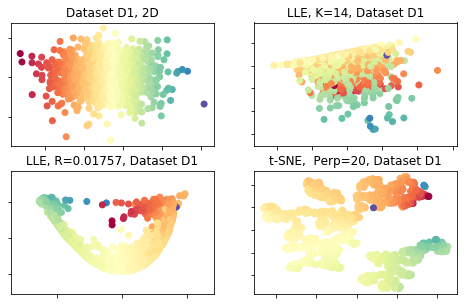

In [17]:
# Plotting a smaller figure that can be included in the report: 
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(221)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('Dataset D1, 2D')
ax.scatter(X_2ds[1][0], X_2ds[1][1],c=colors[1], cmap=plt.cm.Spectral)
ax = fig.add_subplot(222)
ax.set_title('LLE, K=14, Dataset D1')
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.scatter(n_Ys[1][11][:, 0], n_Ys[1][11][:, 1], c=colors[1], cmap=plt.cm.Spectral)

ax = fig.add_subplot(223)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('LLE, R=0.01757, Dataset D1')
ax.scatter(r_Ys[1][25][:, 0], r_Ys[1][25][:, 1], c=colors[1], cmap=plt.cm.Spectral)
ax = fig.add_subplot(224)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('t-SNE,  Perp=20, Dataset D1')
ax.scatter(p_Zs[1][9][:, 0], p_Zs[1][9][:, 1], c=colors[1], cmap=plt.cm.Spectral)

plt.savefig('distribution_d1_comparison.pdf')

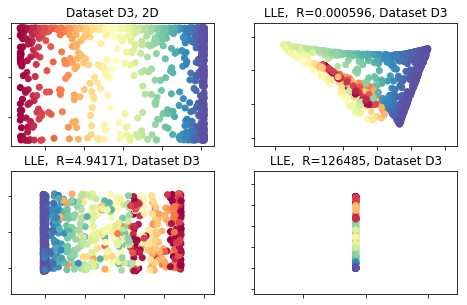

In [18]:
# Plotting a smaller figure that can be included in the report: 
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(221)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('Dataset D3, 2D')
ax.scatter(X_2ds[3][0], X_2ds[3][1],c=colors[3], cmap=plt.cm.Spectral)
ax = fig.add_subplot(222)
ax.set_title('LLE,  R=0.000596, Dataset D3')
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.scatter(r_Ys[3][22][:, 0], r_Ys[3][22][:, 1], c=colors[3], cmap=plt.cm.Spectral)

ax = fig.add_subplot(223)
ax.set_title('LLE,  R=4.94171, Dataset D3')
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.scatter(r_Ys[3][30][:, 0], r_Ys[3][30][:, 1], c=colors[3], cmap=plt.cm.Spectral)
ax = fig.add_subplot(224)
ax.set_title('LLE,  R=126485, Dataset D3')
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.scatter(r_Ys[3][39][:, 0], r_Ys[3][39][:, 1], c=colors[3], cmap=plt.cm.Spectral)

plt.savefig('distribution_d3_comparison.pdf')